### Load Dataset and Visualizaton

In [11]:
import pandas as pd

# Load dataset
df_data = pd.read_csv('../datasets/Mall_Customers.csv')

# Load feature Annual Income and Spending Score from the dataset
X = df_data[['Annual Income (k$)', 'Spending Score (1-100)']].values

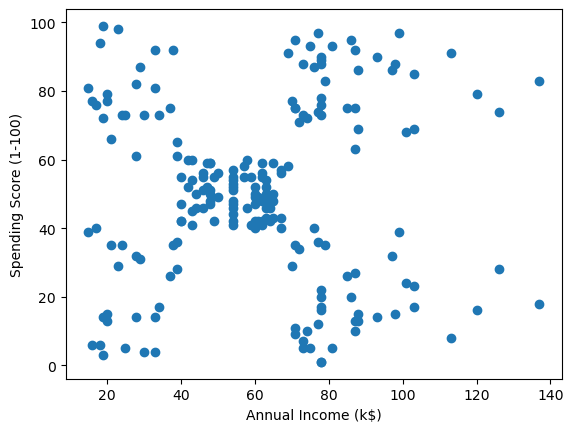

In [12]:
from matplotlib import pyplot as plt
plt.scatter(df_data['Annual Income (k$)'], df_data['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

### Build K-Mean Model

In [14]:
from sklearn.cluster import KMeans

# Initialize KMeans: 5 clusters, 'k-means++' initialization, reproducible with random_state
kmeansModel = KMeans(n_clusters=5, init='k-means++', random_state=42)

# Fit the model to the data
kmeansModel.fit(X)

# Predict cluster labels for each customer
clusters_pred = kmeansModel.predict(X)


In [18]:
# Sum of squared distances of samples to their closest cluster center
print(kmeansModel.inertia_)

44448.45544793369


In [19]:
# Coordinates of the K = 5 centroids
print(kmeansModel.cluster_centers_)

[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]
